# Employee Attrition rate analysis in an organization

### Import required packages and libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter 
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### Read the data set

In [2]:
df = pd.read_csv(r"C:\Users\gnaya\Onedrive\Documents\Attrition.csv")

### Exploratory data analysis 

#### Describe the data set 

In [6]:
df.shape    #Datast has 1470 records and 35 features

(1470, 35)

In [7]:
df.head()  #Printing the first 5 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
df.columns     #To get all the column names

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### To get all the factor datatypes and unique values

In [9]:
for num in df.columns:
     if df[num].dtypes== "object":
        print(str(num))
        print(df[num].unique())
        print(df[num].value_counts())
        print('------------------------------------------------------------------------')

Attrition
['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
------------------------------------------------------------------------
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
------------------------------------------------------------------------
Department
['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
------------------------------------------------------------------------
EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
------------------------------------------------------------

#### Check for the null values

In [10]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### To remove the irrelevant colummns 

In [11]:
# remove : Over18, employee count, employee number,standard hours,

df1 = df.drop(["Over18","StandardHours","EmployeeNumber", "EmployeeCount"], axis = 1)

In [12]:
df1['Attrition1'] = df['Attrition']        #Shifting the target column to the end

In [13]:
df1 = df1.drop('Attrition',axis = 1)  

#### Covert all the non numeric columns to numeric 

In [90]:
df1.Attrition1.replace({"No" : 0 , "Yes" : 1} , inplace = True)
df1.OverTime.replace({"No" : 0 , "Yes" : 1} , inplace = True)
df1.MaritalStatus.replace({"Married" : 1, "Single" : 0 , "Divorced" : 2} , inplace = True)
df1.Gender.replace({"Male" : 1 , "Female" : 0} , inplace = True)
df1.Department.replace({"Research & Development" : 2 , "Sales" : 1 , "Human Resources" : 0 } , inplace = True)
df1.BusinessTravel.replace({"Travel_Rarely" : 1 , "Travel_Frequently" : 2 , "Non-Travel" : 0 } , inplace = True)
df1.EducationField.replace({"Life Sciences" : 0 ,"Medical" : 1 ,"Marketing" : 2 ,"Technical Degree" : 3 ,"Other" : 4 ,"Human Resources" : 5}, inplace = True)
df1.JobRole.replace({"Sales Executive" : 0 ,"Research Scientist" : 1 ,"Laboratory Technician" : 2 ,"Manufacturing Director" : 3 ,"Healthcare Representative" : 4 ,"Manager" : 5,"Sales Representative":6, "Research Director":7,"Human Resources":8}, inplace = True)

#### Visualization using plots

C:\Users\gnaya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition1', ylabel='count'>

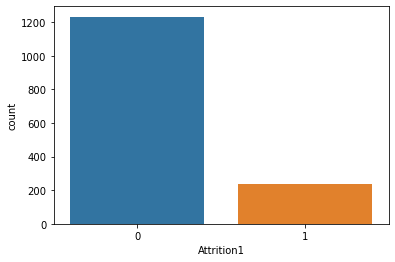

In [15]:
sns.countplot( df1['Attrition1'])   #people leaving the organization : 1233, rest : 237

<AxesSubplot:xlabel='Age', ylabel='count'>

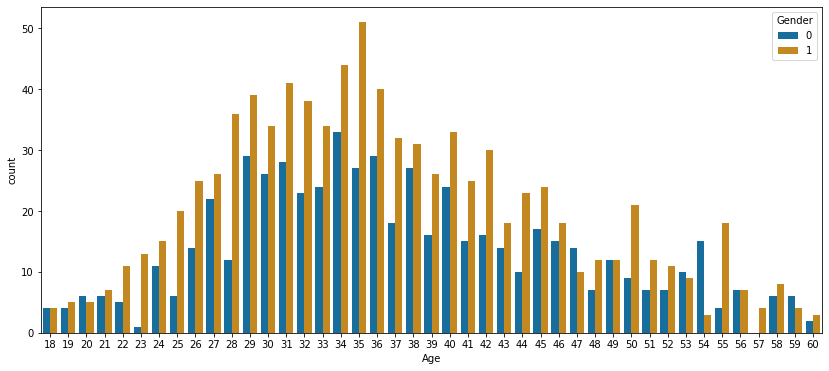

In [16]:
plt.figure(figsize=(14,6))
sns.countplot(x= 'Age', hue = 'Gender', data = df1,palette = 'colorblind')  # There is more attrition among people of age group :29-35

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

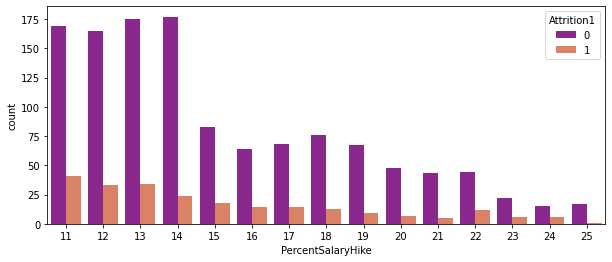

In [17]:
plt.figure(figsize= (10,4))
sns.countplot(x= 'PercentSalaryHike', hue = 'Attrition1', data = df1, palette = 'plasma')  #there is more attrition with low salary hike

<AxesSubplot:>

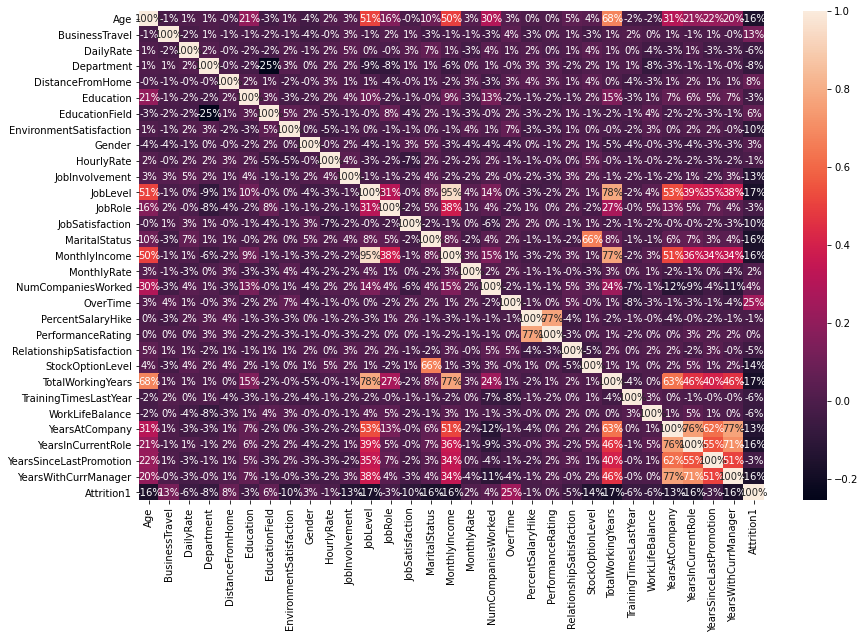

In [18]:
plt.figure(figsize=(14,9))
sns.heatmap(df1.corr(), annot=True, fmt = '.0%')  #Finding the correlation among the features

#### Feature Selection by using Random Forest Instance
we have total of 31 features in the dataset after removing the irrelevant columns. Lets  use top 20 significant features to build our model.we will use Random Forest instance to get feature imporatnce score for the selection of top 20 features.

In [19]:
rf = RandomForestClassifier(random_state=42)

In [20]:
df1_x = df1.iloc[ : , :-1]
df1_y = df1.iloc[ : , -1]
print(df1_x.shape)
print(df1_y.shape)

(1470, 30)
(1470,)


In [21]:
rf.fit(df1_x,df1_y)

RandomForestClassifier(random_state=42)

In [22]:
imporatnce = rf.feature_importances_

In [23]:
df = pd.DataFrame({"columns" : df1_x.columns, "Importance" : imporatnce})
df.sort_values(["Importance"], ascending = False)

,columns,Importance
15,MonthlyIncome,0.080329
0,Age,0.066028
2,DailyRate,0.056181
23,TotalWorkingYears,0.055901
16,MonthlyRate,0.054031
18,OverTime,0.052641
9,HourlyRate,0.048298
4,DistanceFromHome,0.046632
26,YearsAtCompany,0.040240
19,PercentSalaryHike,0.035528


### Seperating Target variable and independant variables 
     Here we will use the top 20 significant features obtained by RFE method.
     we will seperate the dependant(Target) and independant variables.

In [24]:
df1_x = df1.iloc[ : , [0,2,4,6,7,9,12,13,15,16,17,18,19,22,23,24,26,27,28,29]]
df1_y = df1.iloc[ : , -1]

In [25]:
print(df1_x.shape)
print(df1_y.shape)

(1470, 20)
(1470,)


### Handling Class Imbalance 
we will use over sampling to increase the samples for class 1, the minority class.
we will use SMOTE technique for the over sampling. 

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
smk = SMOTE(random_state=42)
df1_x_res1, df1_y_res1 = smk.fit_resample(df1_x,df1_y)

In [28]:
print('Original dataset shape {} '.format(Counter(df1_y)))
print('Resampled dataset shape {}'.format(Counter(df1_y_res1)))

Original dataset shape Counter({0: 1233, 1: 237}) 
Resampled dataset shape Counter({1: 1233, 0: 1233})


### Seperating the  data  into train and test  data using train_test_split

In [29]:
from sklearn.model_selection import train_test_split

In [54]:
df1_x_train, df1_x_test, df1_y_train, df1_y_test = train_test_split(df1_x_res1, df1_y_res1,  test_size=.2,random_state=4)

In [55]:
#checking the samples in both train and test data
print(df1_x_train.shape)
print(df1_x_test.shape)
print('--------------------------------------')
print(df1_y_train.shape)
print(df1_y_test.shape)

(1972, 20)
(494, 20)
--------------------------------------
(1972,)
(494,)


In [56]:
print(df1_x_train[df1_y_train==1].shape)
print(df1_x_train[df1_y_train==0].shape)

(989, 20)
(983, 20)


### Model building using  Random Forest Classifier 

In [57]:
rf1= RandomForestClassifier(n_estimators=10)
rf1.fit(df1_x_res1,df1_y_res1)

RandomForestClassifier(n_estimators=10)

In [58]:
pred_val= rf1.predict(df1_x_test)
pred_val

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,

### Evaluating the Model

we are using the folowing evaluaition matrices : confusion matrix, Tpr & Fpr ratio, Accuracy, Precision,F1 score.
Here the main focus is not only on the accuracy but also the model should perform well for both the classes

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
tab1 = confusion_matrix(df1_y_test, pred_val)
tab1

array([[250,   0],
       [  2, 242]], dtype=int64)

In [60]:
Tp= tab1[0][0]
Fp= tab1[0][1]
Tn= tab1[1][1]
Fn= tab1[1][0]

In [61]:
print('Accuracy : {}'.format(metrics.accuracy_score(df1_y_test,pred_val)))
print('Precision: {}'.format(metrics.precision_score(df1_y_test,pred_val)))
print('F1 score : {}'.format(metrics.f1_score(df1_y_test,pred_val)))
print('Tp ratio : {}'.format(Tp/(Tp+Fn)*100))
print('Fp ratio : {}'.format(Fp/(Fp+Tn)*100))
print('Error    : {}'.format((Fp+Fn)/(tab1.sum())*100))

Accuracy : 0.9959514170040485
Precision: 1.0
F1 score : 0.9958847736625513
Tp ratio : 99.20634920634922
Fp ratio : 0.0
Error    : 0.4048582995951417


### AUROC curve
More the area under ROC curve better is the model. This tells us how good is our model is.

In [62]:
from sklearn.metrics import roc_curve,roc_auc_score

In [63]:
roc_auc_score(df1_y_test,pred_val)

0.9959016393442623

In [64]:
pred_val_prob = rf1.predict_proba(df1_x_test)

In [65]:
tpr,fpr,thre = roc_curve(df1_y_test,pred_val_prob[ : , 1])

Text(0.5, 0.5, 'Area under the curve is = 0.9959')

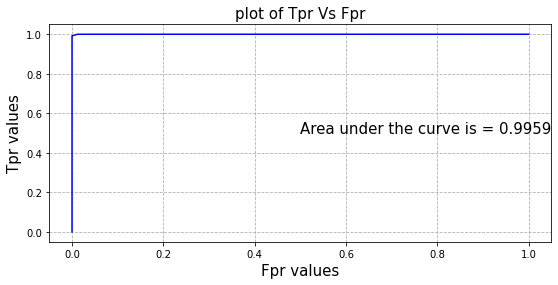

In [66]:
plt.figure(figsize=(9,4))
plt.plot(tpr,fpr, color = 'b')
plt.grid(linestyle = '--')
plt.xlabel('Fpr values',size= 15)
plt.ylabel('Tpr values',size= 15)
plt.title('plot of Tpr Vs Fpr',size=15)
plt.text(x= .5,y=.5,s = 'Area under the curve is = 0.9959', size = 15)

### Cross Validation of the model
Here we are using 7 fold cross validation to validate the model accuracy.Cross validation also tells us the best technique to build the model.

In [67]:
rf= RandomForestClassifier()

In [68]:
rf_score = cross_val_score(rf,df1_x_res1,df1_y_res1, cv=7, scoring= 'accuracy')

In [69]:
print(rf_score.min())
print(rf_score.max())
print(rf_score.mean())

0.7960339943342776
0.9346590909090909
0.9002876549795812


### Deployment of the model 

In [70]:
import pickle

In [71]:
file = 'Model1.pk1'
pickle.dump(rf1, open('Model1.pk1',"wb"))

### Working of the above model 

In [72]:
New_rf1 = pickle.load(open('Model1.pk1',"rb"))

In [76]:
print(New_rf1.predict([[41,1102,1,0,2,94,0,4,5993,19479,8,1,11,0,8,0,6,4,0,5]]))

[1]


C:\Users\gnaya\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [88]:
df1_x_res1.head(1)

,Age,DailyRate,DistanceFromHome,EducationField,EnvironmentSatisfaction,HourlyRate,JobRole,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,0,2,94,0,4,5993,19479,8,1,11,0,8,0,6,4,0,5
